In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from matplotlib import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scipy.stats import randint
from sklearn.metrics import make_scorer, mean_squared_error
from math import sqrt

In [2]:
uploaded = files.upload()
df = pd.read_csv('Resistivity.csv')

Saving Resistivity.csv to Resistivity (2).csv


In [3]:
X = df[['Si', 'Al', 'Fe']].values
y = df['Resistivity'].values

In [4]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Helpers

In [6]:
rcParams['figure.figsize'] = 5,5
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 14

In [7]:
def print_evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('')

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [8]:

def rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true, y_pred))

# List of the models used:

1. Support Vector Machine
2. Ridge Regression
3. KNeighborsRegressor
4. AdaBoostRegressor
5. RandomForestRegressor
6. GradientBoostingRegressor
7. ExtraTreesRegressor
8. XBoost regressor


# 1. Support Vector Machine

In [9]:
from sklearn.svm import SVR

SVM = SVR(kernel='rbf', C=101, epsilon=0.4)
SVM.fit(X_train, y_train)

test_pred = SVM.predict(X_test)
train_pred = SVM.predict(X_train)

print('Train:\n______________________________')
print_evaluate(y_train, train_pred)

print('Test:\n_______________________________')
print_evaluate(y_test, test_pred)


results_df = pd.DataFrame(data=[["SVM", *evaluate(y_test, test_pred)]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])

Train:
______________________________
MAE: 3.7534714431708527
MSE: 32.52598135407397
RMSE: 5.703155385755676
R2 Square 0.9596472315226615

Test:
_______________________________
MAE: 3.785965702605859
MSE: 22.228037795532416
RMSE: 4.714662002257682
R2 Square 0.9816370379156566



In [ ]:
scorer = make_scorer(rmse, greater_is_better=False)
params = {
    'kernel': ('linear', 'rbf'),
    'C': randint(1, 1000),
    'epsilon': uniform(0.001, 1), 
}

search = RandomizedSearchCV(SVM, scoring=scorer, param_distributions=params, random_state=42, n_iter=1000, cv=10, verbose=1, n_jobs=-1, return_train_score=True)

search.fit(X_train, y_train)

print(search.best_score_)
print(search.best_params_)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits
-7.273842946525119
{'C': 101, 'epsilon': 0.3920427630581744, 'kernel': 'rbf'}


# 2. Ridge Regression

In [10]:
from sklearn.linear_model import Ridge

RR = Ridge(alpha=1.9, solver='saga', tol=0.1)
RR.fit(X_train, y_train)
pred = RR.predict(X_test)

test_pred = RR.predict(X_test)
train_pred = RR.predict(X_train)

print('Train:\n______________________________')
print_evaluate(y_train, train_pred)

print('Test:\n_______________________________')
print_evaluate(y_test, test_pred)

results_df_temp = pd.DataFrame(data=[["RR", *evaluate(y_test, test_pred)]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_temp, ignore_index=True)

Train:
______________________________
MAE: 15.514017132438054
MSE: 343.76064634607445
RMSE: 18.540783326118518
R2 Square 0.5735195927643888

Test:
_______________________________
MAE: 15.925041332504726
MSE: 346.71077903322896
RMSE: 18.620171294411577
R2 Square 0.7135762972789264



<ipython-input-10-f6909fc990dc>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_temp, ignore_index=True)


In [11]:
scorer = make_scorer(rmse, greater_is_better=False)
params = {
    'solver': ('svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'),
    'tol': uniform(0.001, 0.1),
    'alpha': uniform(0.1, 100),
}

search = RandomizedSearchCV(RR, scoring=scorer, param_distributions=params, random_state=42, n_iter=1000, cv=10, verbose=1, n_jobs=-1, return_train_score=True)

search.fit(X_train, y_train)

print(search.best_score_)
print(search.best_params_)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


KeyboardInterrupt: ignored

# 3. KNeighborsRegressor

In [12]:
from sklearn.neighbors import KNeighborsRegressor
KNR = KNeighborsRegressor(n_neighbors=3, weights='uniform', algorithm='auto')
KNR.fit(X_train, y_train)

test_pred = KNR.predict(X_test)
train_pred = KNR.predict(X_train)

print('Train:\n______________________________')
print_evaluate(y_train, train_pred)

print('Test:\n_______________________________')
print_evaluate(y_test, test_pred)

results_df_temp = pd.DataFrame(data=[["KNR", *evaluate(y_test, test_pred)]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_temp, ignore_index=True)


Train:
______________________________
MAE: 4.7674242424242435
MSE: 52.2575
RMSE: 7.228934914632998
R2 Square 0.9351676810070978

Test:
_______________________________
MAE: 5.679166666666666
MSE: 44.292638888888916
RMSE: 6.655271511282535
R2 Square 0.9634090936854689



<ipython-input-12-60d804a4cda9>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_temp, ignore_index=True)


In [ ]:
scorer = make_scorer(rmse, greater_is_better=False)
params = {
    'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
    'n_neighbors': randint(2, 7),
}

search = RandomizedSearchCV(KNR, scoring=scorer, param_distributions=params, random_state=42, n_iter=1000, cv=10, verbose=1, n_jobs=-1, return_train_score=True)

search.fit(X_train, y_train)

print(search.best_score_)
print(search.best_params_)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits
-9.441059111419825
{'algorithm': 'auto', 'n_neighbors': 3}


# 4. AdaBoostRegressor

In [13]:
from sklearn.ensemble import AdaBoostRegressor
ABR = AdaBoostRegressor(learning_rate = 0.5, n_estimators = 251, loss='square')
ABR.fit(X_train, y_train)

test_pred = ABR.predict(X_test)
train_pred = ABR.predict(X_train)

print('Train:\n______________________________')
print_evaluate(y_train, train_pred)

print('Test:\n_______________________________')
print_evaluate(y_test, test_pred)

results_df_temp = pd.DataFrame(data=[["ABR", *evaluate(y_test, test_pred)]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_temp, ignore_index=True)

Train:
______________________________
MAE: 5.40379481893461
MSE: 45.157575482566806
RMSE: 6.719938651696666
R2 Square 0.9439760735084566

Test:
_______________________________
MAE: 6.503193334429313
MSE: 56.69405565119463
RMSE: 7.529545514252147
R2 Square 0.9531640712550979



<ipython-input-13-2bb0065c7d88>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_temp, ignore_index=True)


In [ ]:
scorer = make_scorer(rmse, greater_is_better=False)
params = {
    'learning_rate': uniform(0.03, 0.5),
    'n_estimators': randint(10, 300),
}

search = RandomizedSearchCV(ABR, scoring=scorer, param_distributions=params, random_state=42, n_iter=1000, cv=10, verbose=1, n_jobs=-1, return_train_score=True)

search.fit(X_train, y_train)

print(search.best_score_)
print(search.best_params_)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits
-9.129997342201127
{'learning_rate': 0.49636424167700666, 'n_estimators': 251}


# 5. Random Forest Regression

In [14]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators = 288, max_depth=7, min_samples_leaf = 1, min_samples_split = 2)
RF.fit(X_train, y_train)

test_pred = RF.predict(X_test)
train_pred = RF.predict(X_train)

print('Train:\n______________________________')
print_evaluate(y_train, train_pred)

print('Test:\n_______________________________')
print_evaluate(y_test, test_pred)

results_df_temp = pd.DataFrame(data=[["RFR", *evaluate(y_test, test_pred)]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_temp, ignore_index=True)

Train:
______________________________
MAE: 2.653646821453084
MSE: 11.453572924880019
RMSE: 3.3843127699549314
R2 Square 0.9857903326130356

Test:
_______________________________
MAE: 3.785008184873003
MSE: 23.106061391724065
RMSE: 4.80687646936387
R2 Square 0.9809116876101398



<ipython-input-14-35bcc0d83498>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_temp, ignore_index=True)


In [ ]:
scorer = make_scorer(rmse, greater_is_better=False)
params = {
    'n_estimators': randint(10, 300),
    'max_depth': randint(2, 8),
    'min_samples_split': randint(2,8),
    'min_samples_leaf': randint(1,8),
}

search = RandomizedSearchCV(RF, scoring=scorer, param_distributions=params, random_state=42, n_iter=1000, cv=10, verbose=1, n_jobs=-1, return_train_score=True)

search.fit(X_train, y_train)

print(search.best_score_)
print(search.best_params_)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits
-7.8242816672072975
{'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 288}


# 6. GradientBoostingRegressor

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators = 150, max_depth = 6, min_samples_leaf = 1, min_samples_split = 7)
GBR.fit(X_train, y_train)
test_pred = GBR.predict(X_test)
train_pred = GBR.predict(X_train)

print('Train:\n______________________________')
print_evaluate(y_train, train_pred)

print('Test:\n_______________________________')
print_evaluate(y_test, test_pred)

results_df_temp = pd.DataFrame(data=[["GBR", *evaluate(y_test, test_pred)]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_temp, ignore_index=True)

Train:
______________________________
MAE: 0.04456747870929875
MSE: 0.0035606235024335017
RMSE: 0.05967096029421264
R2 Square 0.9999955825770708

Test:
_______________________________
MAE: 4.544415202153278
MSE: 28.512184484924852
RMSE: 5.339680185640789
R2 Square 0.976445596887382



<ipython-input-15-a4c041f7153a>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_temp, ignore_index=True)


In [ ]:
scorer = make_scorer(rmse, greater_is_better=False)
params = {
    'n_estimators': randint(10, 300),
    'max_depth': randint(2, 8),
    'min_samples_split': randint(2,8),
    'min_samples_leaf': randint(1,8),
}

search = RandomizedSearchCV(GBR, scoring=scorer, param_distributions=params, random_state=42, n_iter=1000, cv=10, verbose=1, n_jobs=-1, return_train_score=True)

search.fit(X_train, y_train)

print(search.best_score_)
print(search.best_params_)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits
-7.213469844850964
{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 154}


# 7. ExtraTreesRegressor

In [16]:
from sklearn.ensemble import ExtraTreesRegressor
ETR = ExtraTreesRegressor(n_estimators = 140, max_depth=7, min_samples_leaf = 1, min_samples_split = 3)
ETR.fit(X_train, y_train)
test_pred = ETR.predict(X_test)
train_pred = ETR.predict(X_train)

print('Train:\n______________________________')
print_evaluate(y_train, train_pred)

print('Test:\n_______________________________')
print_evaluate(y_test, test_pred)

results_df_temp = pd.DataFrame(data=[["ETR", *evaluate(y_test, test_pred)]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_temp, ignore_index=True)

Train:
______________________________
MAE: 2.43763895778267
MSE: 10.509556705061511
RMSE: 3.241844645423576
R2 Square 0.9869615092039125

Test:
_______________________________
MAE: 4.269415249432263
MSE: 24.696823167839494
RMSE: 4.969589838994713
R2 Square 0.9795975321075835



<ipython-input-16-03b5e46b61d9>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_temp, ignore_index=True)


In [18]:
scorer = make_scorer(rmse, greater_is_better=False)
params = {
    'n_estimators': randint(10, 300),
    'max_depth': randint(2, 8),
    'min_samples_split': randint(2, 8),
    'min_samples_leaf': randint(1, 8),
}

search = RandomizedSearchCV(ETR, scoring=scorer, param_distributions=params, random_state=42, n_iter=1000, cv=10, verbose=1, n_jobs=-1, return_train_score=True)

search.fit(X_train, y_train)

print(search.best_score_)
print(search.best_params_)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits
-7.215881797041725
{'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 143}


# 8 XGBoost

In [17]:
import xgboost as xgb
XGB = xgb.XGBRegressor(colsample_bytree = 0.7, gamma = 0.17, learning_rate = 0.14, max_depth = 3, n_estimators = 126, subsample = 0.69)
XGB.fit(X_train, y_train)
test_pred = XGB.predict(X_test)
train_pred = XGB.predict(X_train)

print('Train:\n______________________________')
print_evaluate(y_train, train_pred)

print('Test:\n_______________________________')
print_evaluate(y_test, test_pred)

results_df_temp = pd.DataFrame(data=[["XGB", *evaluate(y_test, test_pred)]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square'])
results_df = results_df.append(results_df_temp, ignore_index=True)

Train:
______________________________
MAE: 1.0828427054665304
MSE: 2.088452284025813
RMSE: 1.445147841580858
R2 Square 0.9974089995755745

Test:
_______________________________
MAE: 3.6004625320434562
MSE: 21.4839730883835
RMSE: 4.635080699230975
R2 Square 0.982251722492467



<ipython-input-17-b40e9d42fe11>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_temp, ignore_index=True)


In [28]:
scorer = make_scorer(rmse, greater_is_better=False)
params = {
    "colsample_bytree": uniform(0.3, 0.7),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.5), 
    "max_depth": randint(2, 8), 
    "n_estimators": randint(10, 300), 
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(XGB, scoring=scorer, param_distributions=params, random_state=42, n_iter=1000, cv=10, verbose=1, n_jobs=-1, return_train_score=True)

search.fit(X_train, y_train)

print(search.best_score_)
print(search.best_params_)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits
-6.682699236933473
{'colsample_bytree': 0.6905115729620512, 'gamma': 0.4798955102024251, 'learning_rate': 0.05434742419996488, 'max_depth': 7, 'n_estimators': 235, 'subsample': 0.429693795233478}


# Results

In [18]:
results_df

,Model,MAE,MSE,RMSE,R2 Square
0,SVM,3.785966,22.228038,4.714662,0.981637
1,RR,15.925041,346.710779,18.620171,0.713576
2,KNR,5.679167,44.292639,6.655272,0.963409
3,ABR,6.503193,56.694056,7.529546,0.953164
4,RFR,3.785008,23.106061,4.806876,0.980912
5,GBR,4.544415,28.512184,5.339680,0.976446
6,ETR,4.269415,24.696823,4.969590,0.979598
7,XGB,3.600463,21.483973,4.635081,0.982252


In [18]:
results_df.to_csv('Resistivity_comparision.csv')
files.download('Resistivity_comparision.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: ylabel='Model'>

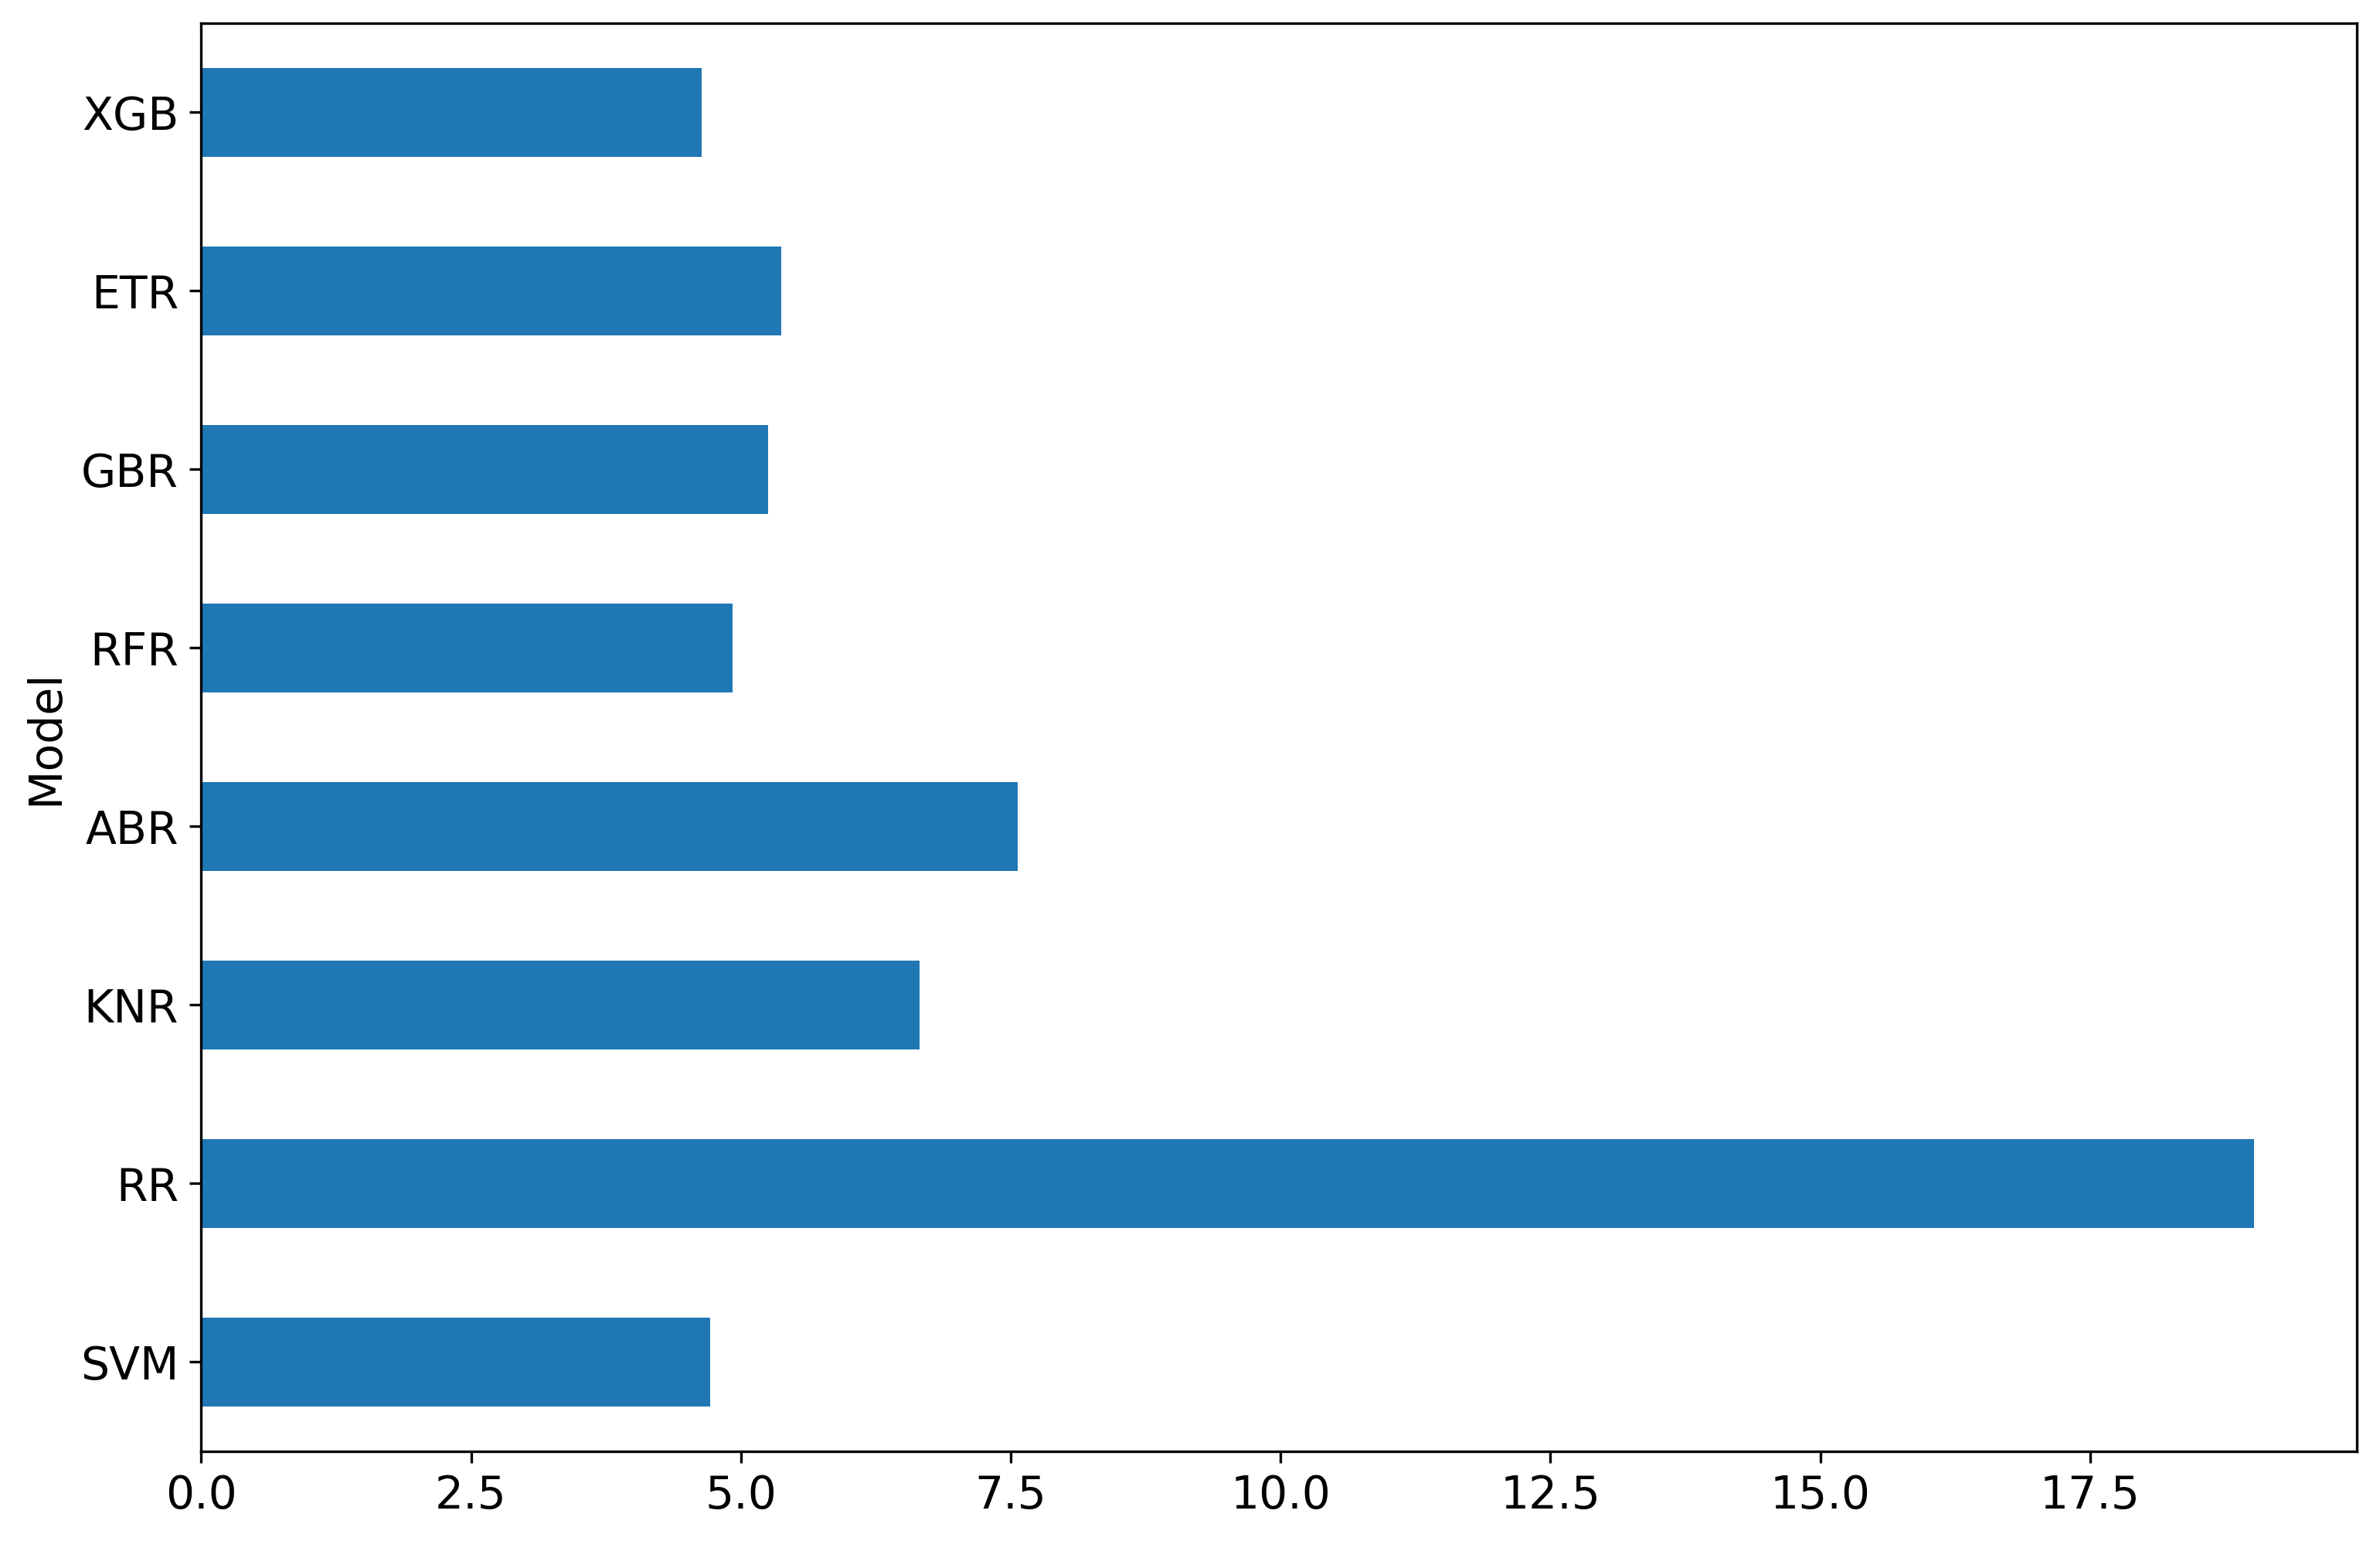

In [19]:
results_df.set_index('Model', inplace=True)
results_df['RMSE'].plot(kind='barh', figsize=(12, 8))


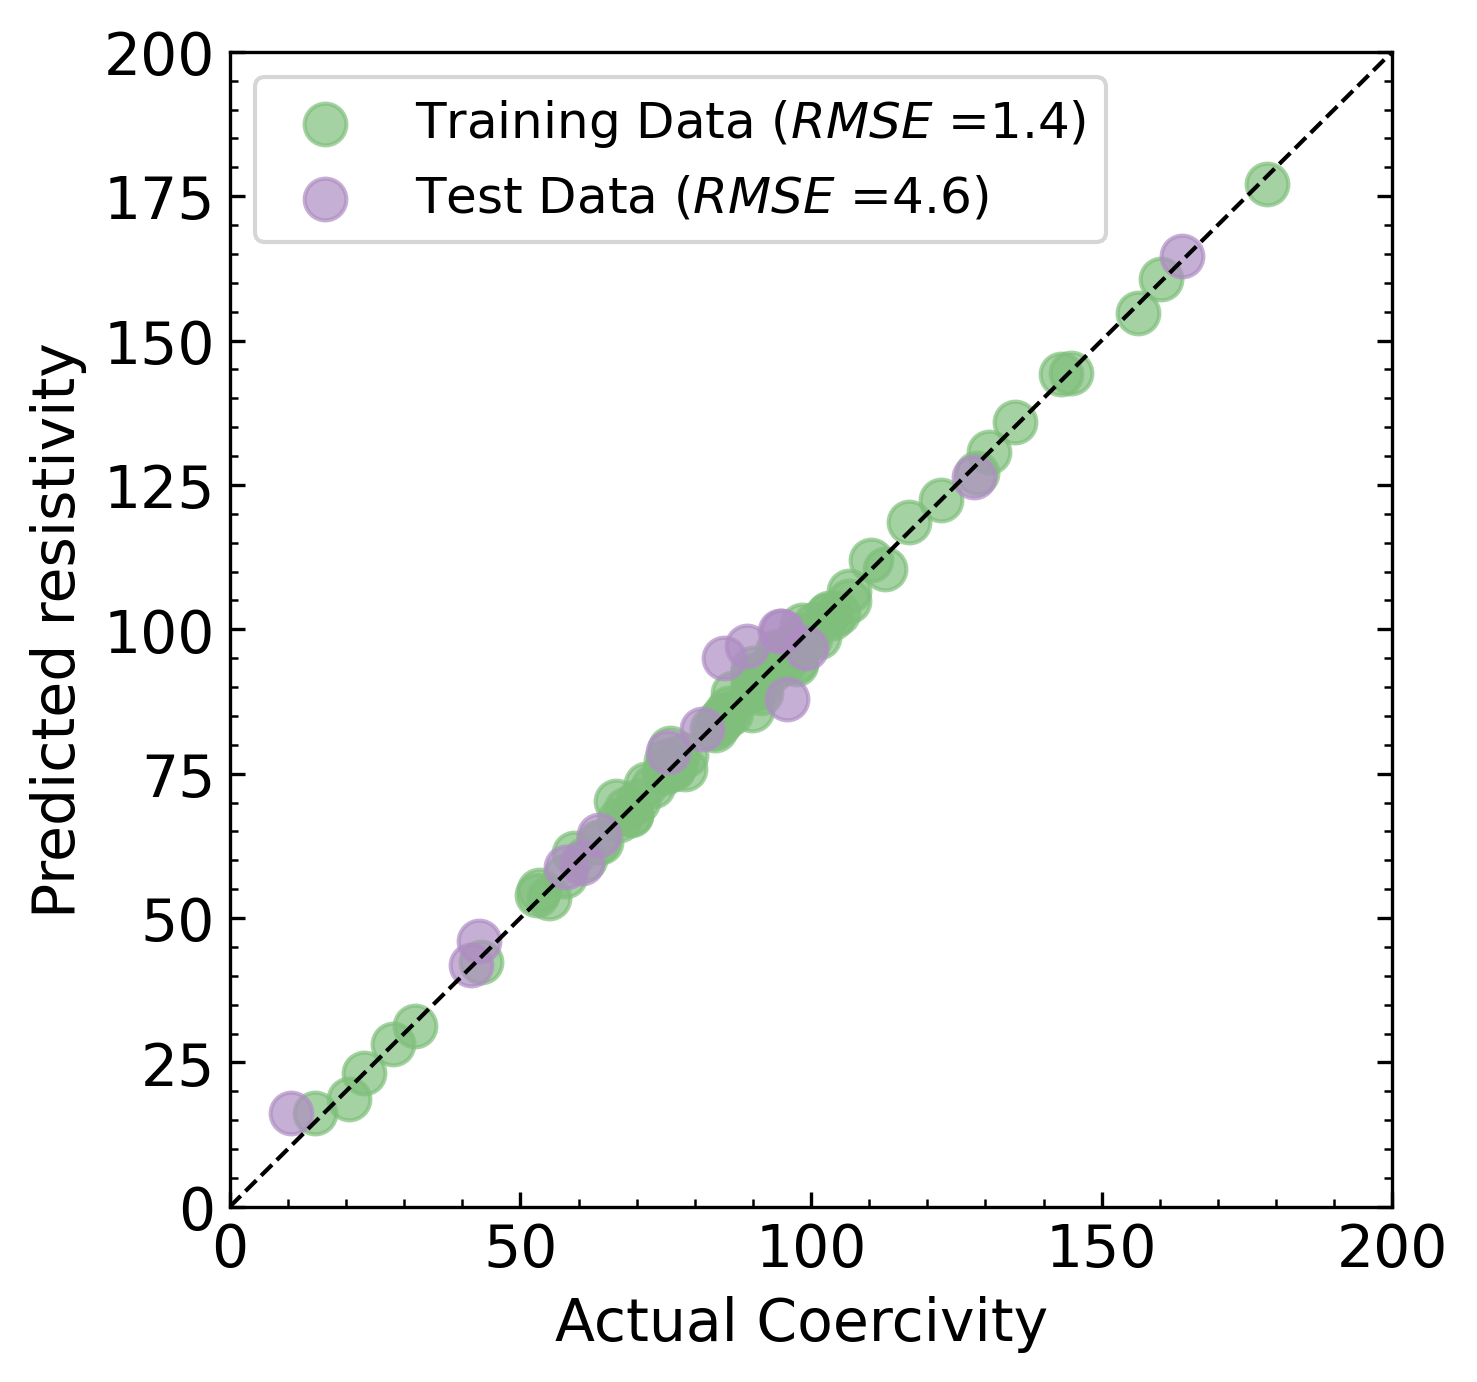

In [19]:
#Plot performance of the best model
from sklearn.metrics import mean_squared_error
y_train_predict=XGB.predict(X_train)
y_test_predict=XGB.predict(X_test)

RMSE_train = mean_squared_error(y_train, y_train_predict, sample_weight=None, multioutput='uniform_average', squared=False)
RMSE_test = mean_squared_error(y_test, y_test_predict, sample_weight=None, multioutput='uniform_average', squared=False)

plt.figure()
plt.scatter(y_train,y_train_predict, s=100, color ='#7fbf7b', alpha=0.7, label='Training Data ($RMSE$ ={0:.1f})'.format(RMSE_train))
plt.scatter(y_test,y_test_predict,s=100, color = '#af8dc3', alpha=0.7, label='Test Data ($RMSE$ ={0:.1f})'.format(RMSE_test))
plt.axline((0, 0), (5, 5), color = 'k', linewidth=1, linestyle='dashed')
plt.xlabel('Actual Coercivity ')
plt.ylabel('Predicted resistivity')
plt.tick_params()
plt.xlim((0,200))
plt.ylim((0,200))
plt.legend(loc = 2, fontsize=12)
plt.minorticks_on()
plt.tick_params(direction='in', which='major', right=True)
plt.tick_params(direction='in', which='minor', left=True, right=True)

# Final training using full data 

In [20]:
XGB.fit(X, y)
train_pred = XGB.predict(X)

print('Train set evaluation:\n')
print_evaluate(y, train_pred)

Train set evaluation:

MAE: 1.2765214975063612
MSE: 2.7201222417399245
RMSE: 1.6492793098016856
R2 Square 0.9968956772944749



In [21]:
ETR.fit(X, y)
train_pred = ETR.predict(X)

print('Train set evaluation:\n')
print_evaluate(y, train_pred)

Train set evaluation:

MAE: 2.4629900170811205
MSE: 10.210254904734974
RMSE: 3.1953489488215485
R2 Square 0.9883476096612138



In [22]:
GBR.fit(X, y)
train_pred = GBR.predict(X)

print('Train set evaluation:\n')
print_evaluate(y, train_pred)

Train set evaluation:

MAE: 0.10305569300262206
MSE: 0.016328974655539667
RMSE: 0.12778487647425132
R2 Square 0.9999813646585425



In [23]:
SVM.fit(X, y)
train_pred = SVM.predict(X)

print('Train set evaluation:\n')
print_evaluate(y, train_pred)

Train set evaluation:

MAE: 3.5835317226103993
MSE: 29.45012904846683
RMSE: 5.4267973104278395
R2 Square 0.9663902221440895



In [24]:
ABR.fit(X, y)
train_pred = ABR.predict(X)

print('Train set evaluation:\n')
print_evaluate(y, train_pred)

Train set evaluation:

MAE: 5.383201782423473
MSE: 44.09492492311103
RMSE: 6.640400961019676
R2 Square 0.949676939316639



In [25]:
RF.fit(X, y)
train_pred = RF.predict(X)

print('Train set evaluation:\n')
print_evaluate(y, train_pred)

Train set evaluation:

MAE: 2.5101756320102284
MSE: 10.700189786852052
RMSE: 3.2711144563973993
R2 Square 0.9877884745034453



# Prediction

In [27]:
uploaded = files.upload()

Saving Empty ds 15x15.csv to Empty ds 15x15 (1).csv


In [34]:
prediction = pd.read_csv('Empty ds 15x15.csv')
X_new = prediction[['Si', 'Al', 'Fe']].values

In [35]:
X_new

array([[  0. ,   0. , 100. ],
       [  0.1,   0. ,  99.9],
       [  0.2,   0. ,  99.8],
       ...,
       [ 14.8,  15. ,  70.2],
       [ 14.9,  15. ,  70.1],
       [ 15. ,  15. ,  70. ]])

In [36]:
X_new = scaler.transform(X_new)

In [37]:
pred_SVM = SVM.predict(X_new)
pred_KNR = KNR.predict(X_new)
pred_GBR = GBR.predict(X_new)
pred_ABR = ABR.predict(X_new)
pred_RF = RF.predict(X_new)
pred_ETR = ETR.predict(X_new)
pred_XGB = XGB.predict(X_new)

In [38]:
prediction['predicted SVM'] = pred_SVM
prediction['predicted KNR'] = pred_KNR
prediction['predicted ABR'] = pred_ABR
prediction['predicted RF'] = pred_RF
prediction['predicted GBR'] = pred_GBR
prediction['predicted ETR'] = pred_ETR
prediction['predicted XGB'] = pred_XGB

In [39]:
prediction.to_csv('Resistivity_prediction.csv')
files.download('Resistivity_prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>